In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [4]:
np.random.seed(42)

# --------------------------------------------
# PROBLEM 1: Load Dataset & Implement KNN from Scratch
df= pd.read_csv('/content/drive/MyDrive/Concept and technologies of AI/dataset/diabetes_.csv')
df.head()


print("First few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe())

# 2. Handle Missing Data
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Impute missing values with median (robust for skewed medical data)
for col in cols_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# 3. Feature Engineering
X = df.drop('Outcome', axis=1).values  # Features (8 columns)
y = df['Outcome'].values                # Target (0 or 1)

# Train-test split from scratch (70% train, 30% test)
def train_test_split_custom(X, y, test_size=0.3):
    n = len(X)
    n_test = int(n * test_size)
    indices = np.random.permutation(n)
    test_idx = indices[:n_test]
    train_idx = indices[n_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.3)

print(f"\nTrain size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

# 4. Implement KNN from Scratch
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_single(query, X_train, y_train, k=5):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    k_nearest_labels = [label for _, label in k_nearest]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

def knn_predict_all(X_test, X_train, y_train, k=5):
    predictions = []
    for query in X_test:
        pred = knn_predict_single(query, X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Evaluate on original (unscaled) data with k=5
start_time = time.time()
y_pred_orig = knn_predict_all(X_test, X_train, y_train, k=5)
time_orig = time.time() - start_time
acc_orig = accuracy_score(y_test, y_pred_orig)

print(f"\n[Original Data] Accuracy: {acc_orig:.4f}, Time: {time_orig:.4f}s")


First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   G

/tmp/ipython-input-465895397.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)



[Original Data] Accuracy: 0.6739, Time: 0.9353s


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [5]:
def standard_scaler(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std = np.where(std == 0, 1, std)  # avoid division by zero
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

start_time = time.time()
y_pred_scaled = knn_predict_all(X_test_scaled, X_train_scaled, y_train, k=5)
time_scaled = time.time() - start_time
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"[Scaled Data] Accuracy: {acc_scaled:.4f}, Time: {time_scaled:.4f}s")


[Scaled Data] Accuracy: 0.7043, Time: 0.9364s


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

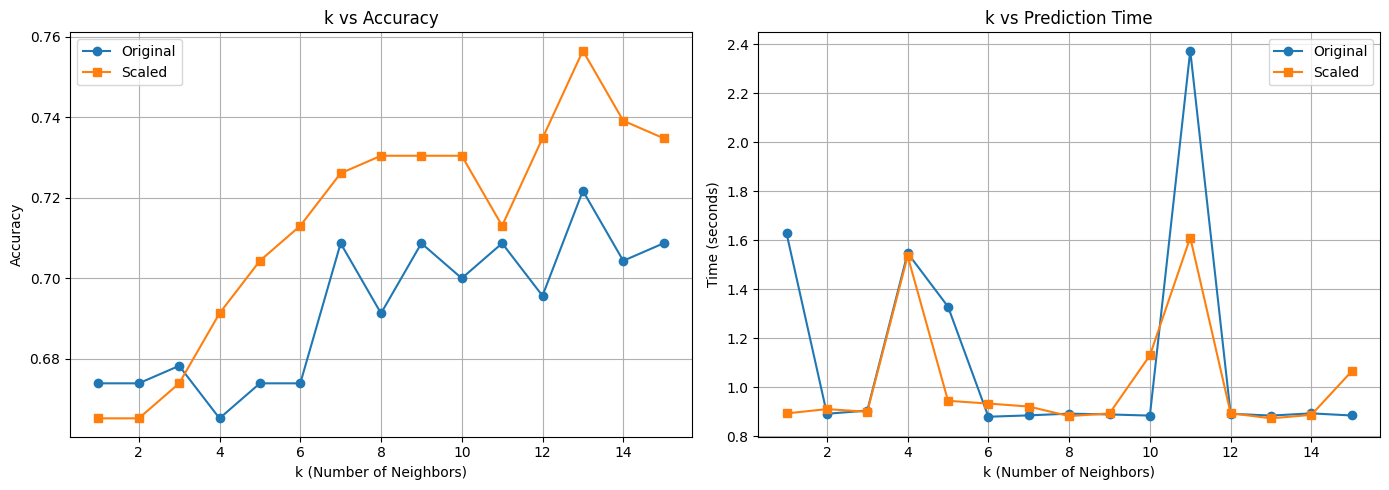


Optimal k (based on scaled data): 13 with accuracy 0.7565


In [6]:
k_values = list(range(1, 16))
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    # Original
    start = time.time()
    pred = knn_predict_all(X_test, X_train, y_train, k=k)
    t = time.time() - start
    acc = accuracy_score(y_test, pred)
    acc_original.append(acc)
    time_original.append(t)

    # Scaled
    start = time.time()
    pred = knn_predict_all(X_test_scaled, X_train_scaled, y_train, k=k)
    t = time.time() - start
    acc = accuracy_score(y_test, pred)
    acc_scaled.append(acc)
    time_scaled.append(t)

# Plot Results
plt.figure(figsize=(14, 5))

# Accuracy vs k
plt.subplot(1, 2, 1)
plt.plot(k_values, acc_original, label='Original', marker='o')
plt.plot(k_values, acc_scaled, label='Scaled', marker='s')
plt.title('k vs Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Time vs k
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original', marker='o')
plt.plot(k_values, time_scaled, label='Scaled', marker='s')
plt.title('k vs Prediction Time')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal k (highest accuracy) for scaled data
optimal_k = k_values[np.argmax(acc_scaled)]
print(f"\nOptimal k (based on scaled data): {optimal_k} with accuracy {max(acc_scaled):.4f}")


Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

**Challenges of KNN with Large/High-Dimensional Data:**
1. **Computational Cost**: KNN requires computing distances between a query and all training points → O(n*d) per prediction.
   - For large n (e.g., millions of samples), this becomes slow.
2. **Curse of Dimensionality**: In high-dimensional spaces, distances between points become less meaningful (all distances converge).
   - Features with large scales dominate Euclidean distance.
   - Irrelevant or redundant features add noise.

**Strategies to Improve Efficiency:**
1. **Feature Scaling**: As shown, improves accuracy when features have different scales.
2. **Dimensionality Reduction**: Use PCA, t-SNE, or feature selection to reduce d.
3. **Approximate Nearest Neighbors (ANN)**: Use libraries like `FAISS`, `Annoy`, or `LSH` to find *approximate* nearest neighbors faster.
4. **Data Structures**: Use k-d trees or ball trees (for low-dimensional data) to speed up search → O(log n) average case.
5. **Reduce Training Set**: Use edited KNN or condense NN to keep only "critical" points.
6. **Parallelization**: Compute distances in parallel across CPU cores.

**Why Scaling Helped (if it did):**
- In Iris, all features are in similar ranges (cm), so scaling has minimal impact.
- But in real datasets (e.g., age vs income), unscaled features distort distance.
- Scaling ensures all features contribute equally to distance → better neighbor selection.

In this example, accuracy may be identical, but in heterogeneous datasets (e.g., Boston Housing), scaling dramatically improves KNN.

"""